In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Componente perpendicular do spin
## $$\vec{S}^{\perp} = \vec{S} - (\hat{q} \cdot \vec{S})\hat{q}$$

## $$\hat{m}^{\perp} = (\vec{\hat{m}} - (\hat{q} \cdot \hat{m})\hat{q})$$

# <span style="color:red"> $$ \vec{S}^{\perp} = S \hat{m}^{\perp} $$ </span>

## Intensidade de espalhamento

# $$\mathcal{I}(\vec{q}) = \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^N \vec{S}_i^{\perp} \cdot \vec{S}_j^{\perp} e^{i\vec{q}\cdot(\vec{r}_i - \vec{r}j)}$$ 

## $$\mathcal{I}(\vec{q}) = \frac{1}{N} \left[ \sum_{i=1}^N \vec{S}_i^{\perp} e^{i\vec{q}\cdot\vec{r}_i} \right] \cdot \left[ \sum_{j=1}^N \vec{S}_j^{\perp} e^{-i\vec{q}\cdot\vec{r}_j} \right]$$ 

## $e^{\pm i\vec{q}\cdot\vec{r}_i} = cos(\vec{q} \cdot \vec{r}_i) \pm i sin(\vec{q} \cdot \vec{r}_i)$

## $\vec{\mathcal{A}}(\vec{q}) = \sum_{\alpha = 1}^N \vec{S}_{\alpha}^{\perp} cos(\vec{q} \cdot \vec{r}_{\alpha})$

## $\vec{\mathcal{B}}(\vec{q}) = \sum_{\alpha = 1}^N \vec{S}_{\alpha}^{\perp} sin(\vec{q} \cdot \vec{r}_{\alpha})$

## $\mathcal{I}(\vec{q}) = \frac{1}{N} (\vec{\mathcal{A}} + i \vec{\mathcal{B}}) \cdot (\vec{\mathcal{A}} - i \vec{\mathcal{B}}) $

# <span style="color:red"> $$\mathcal{I}(\vec{q}) = \frac{1}{N} (\vec{\mathcal{A}}^2 + \vec{\mathcal{B}}^2)$$ </span>

In [101]:
from math import sqrt, sin, cos

def perp_m(mx, my, qx, qy):
    mxp = np.zeros([len(qx), len(qy), len(mx)])
    myp = np.zeros([len(qx), len(qy), len(my)])
    
    for i in range(len(qx)):
        for j in range(len(qy)):
            for k in range(len(mx)):    
                qmod = sqrt(qx[i][j]**2 + qy[i][j]**2)
    
                fac = (mx[k]*qx[i][j] + my[k]*qy[i][j])/qmod
                mxp[i][j][k] = mx[k] - fac*qx[i][j]/qmod
                myp[i][j][k] = my[k] - fac*qy[i][j]/qmod
    
    return mxp, myp

In [102]:
def calc_AB(mxp, myp, qx, qy, rx, ry):
    Axk = np.zeros([len(qx), len(qy), len(rx)])
    Ayk = np.zeros([len(qx), len(qy), len(ry)])
    Bxk = np.zeros([len(qx), len(qy), len(rx)])
    Byk = np.zeros([len(qx), len(qy), len(ry)])
    
    for i in range(len(qx)):
        for j in range(len(qy)):
            for k in range(len(rx)):
                fac = qx[i][j]*rx[k] + qy[i][j]*ry[k]
                Axk[i][j][k] = mxp[i][j][k]*cos(fac)
                Ayk[i][j][k] = myp[i][j][k]*cos(fac)
                
                Bxk[i][j][k] = mxp[i][j][k]*sin(fac)
                Byk[i][j][k] = myp[i][j][k]*sin(fac)
                
    return Axk, Ayk, Bxk, Byk

In [103]:
def calc_A2B2(S, Axk, Ayk, Bxk, Byk):
    Ax = np.zeros([Axk.shape[0], Axk.shape[1]])
    Ay = np.zeros([Axk.shape[0], Axk.shape[1]])
    Bx = np.zeros([Axk.shape[0], Axk.shape[1]])
    By = np.zeros([Axk.shape[0], Axk.shape[1]])
    
    for i in range(Axk.shape[0]):
        for j in range(Axk.shape[1]):
            for k in range(len(S)):
                Ax[i][j] += S[k]*Axk[i][j][k]
                Ay[i][j] += S[k]*Ayk[i][j][k]
                
                Bx[i][j] += S[k]*Bxk[i][j][k]
                By[i][j] += S[k]*Byk[i][j][k]
    
    A2 = np.zeros([Axk.shape[0], Axk.shape[1]])
    B2 = np.zeros([Axk.shape[0], Axk.shape[1]])
    
    for i in range(Axk.shape[0]):
        for j in range(Axk.shape[1]):
            A2[i][j] = Ax[i][j]**2 + Ay[i][j]**2
            B2[i][j] = Bx[i][j]**2 + By[i][j]**2
    
    return A2, B2

In [104]:
def intensity(S, Axk, Ayk, Bxk, Byk):
    Intens = np.zeros([Axk.shape[0], Axk.shape[1]])
    
    A2, B2 = calc_A2B2(S, Axk, Ayk, Bxk, Byk)
    
    for i in range(Axk.shape[0]):
        for j in range(Axk.shape[1]):
            Intens[i][j] = A2[i][j] + B2[i][j]
    
    Intens /= len(S)
    return Intens
    

In [105]:
def gerar_rede(dtheta = 0):
    x0 = [0, 0.5, 1.0]
    y0 = [0, np.sin(np.deg2rad(60)), 0]
    
    mx0 = [-np.cos(np.deg2rad(30 + dtheta)), np.cos(np.deg2rad(90+ dtheta)), -np.cos(np.deg2rad(150+ dtheta))]
    my0 = [-np.sin(np.deg2rad(30+ dtheta)), np.sin(np.deg2rad(90+ dtheta)), -np.sin(np.deg2rad(150+ dtheta))]
    
    x = []
    y = []
    mx = []
    my = []

    for j in range(6):
        for i in range(6):
            for k in range(3):
                x.append(x0[k] + 2*i + (j)%2)
                y.append(y0[k] + 2*np.sin(np.deg2rad(60))*(j))
                mx.append(mx0[k])
                my.append(my0[k])
                
    return x, y, mx, my

In [121]:
MM = 100
qx = np.linspace(-3*np.pi, 3*np.pi, MM)
qy = np.linspace(-3*np.pi, 3*np.pi, MM)
qx, qy = np.meshgrid(qx, qy)

(-0.6000000000000001, 12.6, -0.4763139720814413, 10.002593413710265)

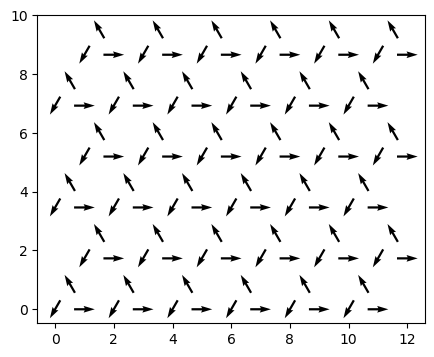

In [157]:
rx, ry, mx, my = gerar_rede(30)

plt.figure(figsize=(5,4))
plt.quiver(rx, ry, mx, my, pivot='middle')
plt.axis('equal')

In [158]:
S = [
    1, 1, -1,
    1, -1, 1,
    -1, 1, 1,
    1, 1, -1,
    1, -1, 1,
    -1, 1, 1,
    -1, 1, 1,
    1, 1, -1,
    1, -1, 1,
    -1, 1, 1,
    1, 1, -1,
    1, -1, 1
]*3
S = np.array(S)
S = np.ones(len(rx))

(-0.6000000000000001, 12.6, -0.4763139720814413, 10.002593413710265)

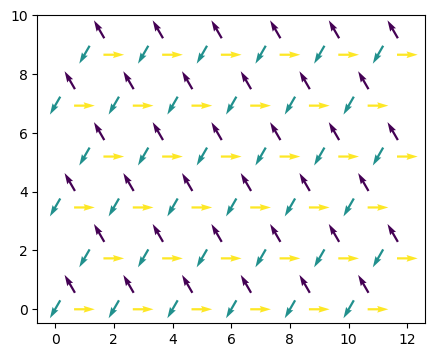

In [159]:
C = np.arctan2(S*my, S*mx)
C[C<0] = 2*np.pi + C[C<0] 

plt.figure(figsize=(5,4))
plt.quiver(rx, ry, S*mx, S*my, C, pivot='middle')
plt.axis('equal')

In [160]:
mxp, myp = perp_m(mx, my, qx, qy)
Axk, Ayk, Bxk, Byk = calc_AB(mxp, myp, qx, qy, rx, ry)

In [161]:
Intens = intensity(S, Axk, Ayk, Bxk, Byk)

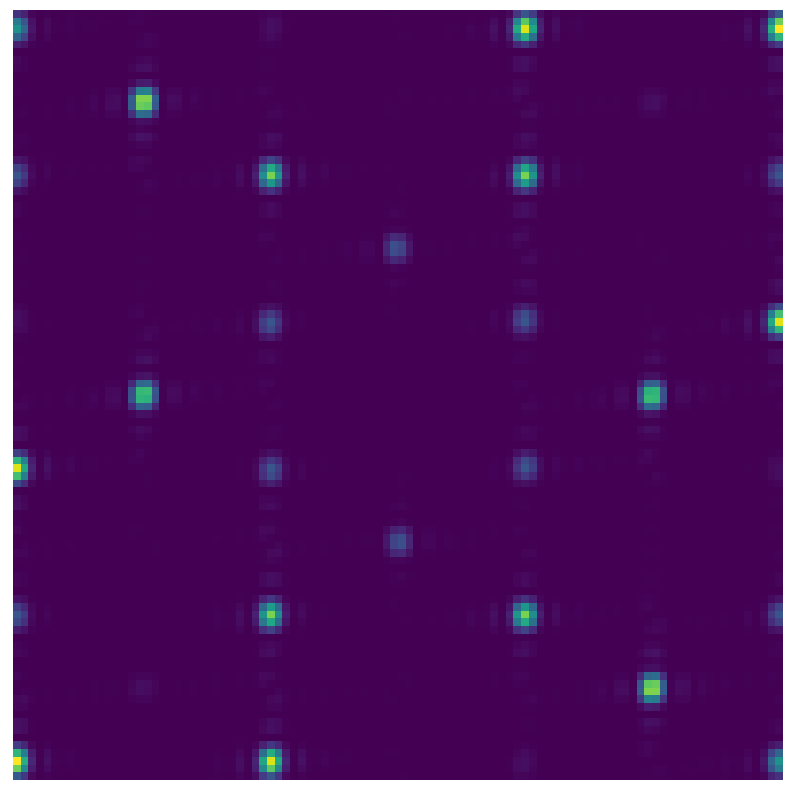

In [162]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.axis('off')
plt.imshow(Intens)

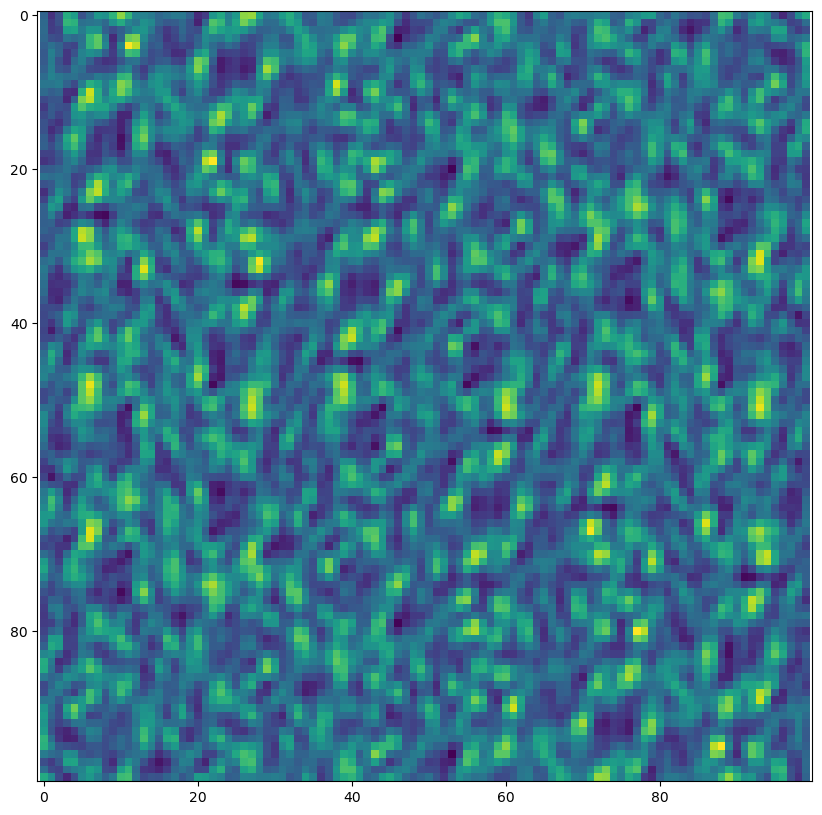

In [148]:
Inte = np.zeros([Axk.shape[0], Axk.shape[1]])
Smed = np.zeros(len(rx))

for i in range(10):
    S = np.random.choice([-1,1], len(rx))
    Smed += S
    
    Inte += intensity(S, Axk, Ayk, Bxk, Byk)
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.imshow(Inte)

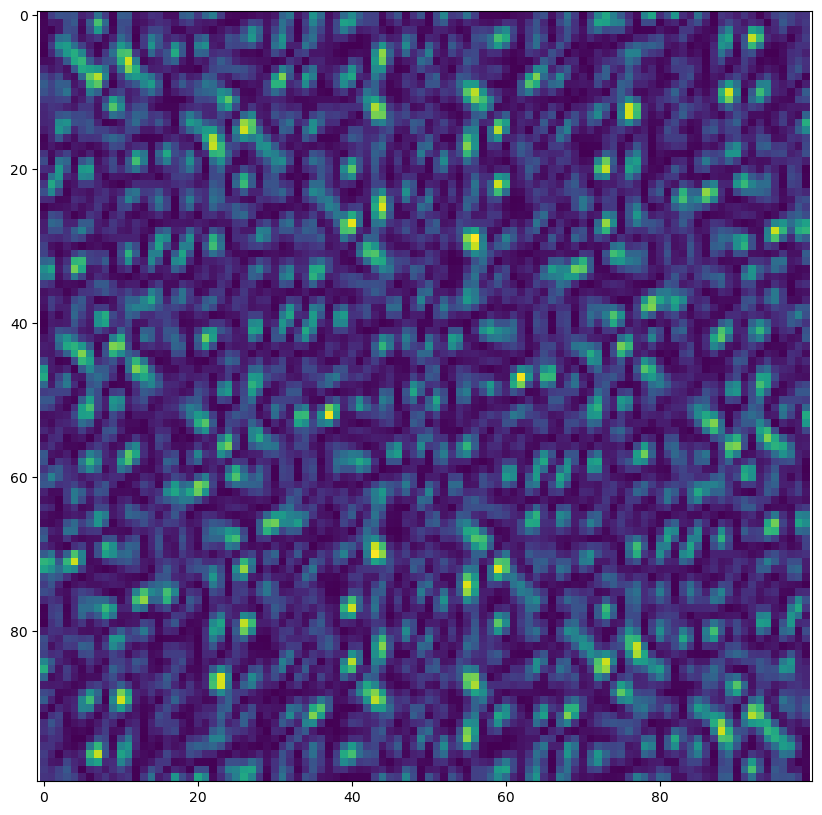

In [137]:
Inte = intensity(Smed/10, Axk, Ayk, Bxk, Byk)
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.imshow(Inte)

(-0.6000000000000001, 12.6, -0.4763139720814413, 10.002593413710265)

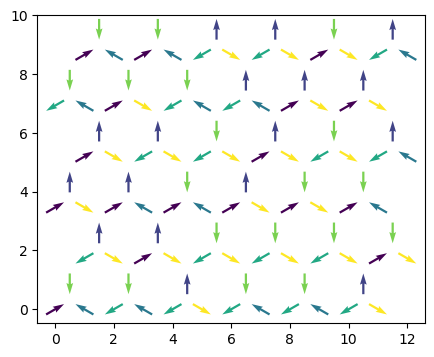

In [128]:
C = np.arctan2(S*my, S*mx)
C[C<0] = 2*np.pi + C[C<0] 

plt.figure(figsize=(5,4))
plt.quiver(rx, ry, S*mx, S*my, C, pivot='middle')
plt.axis('equal')

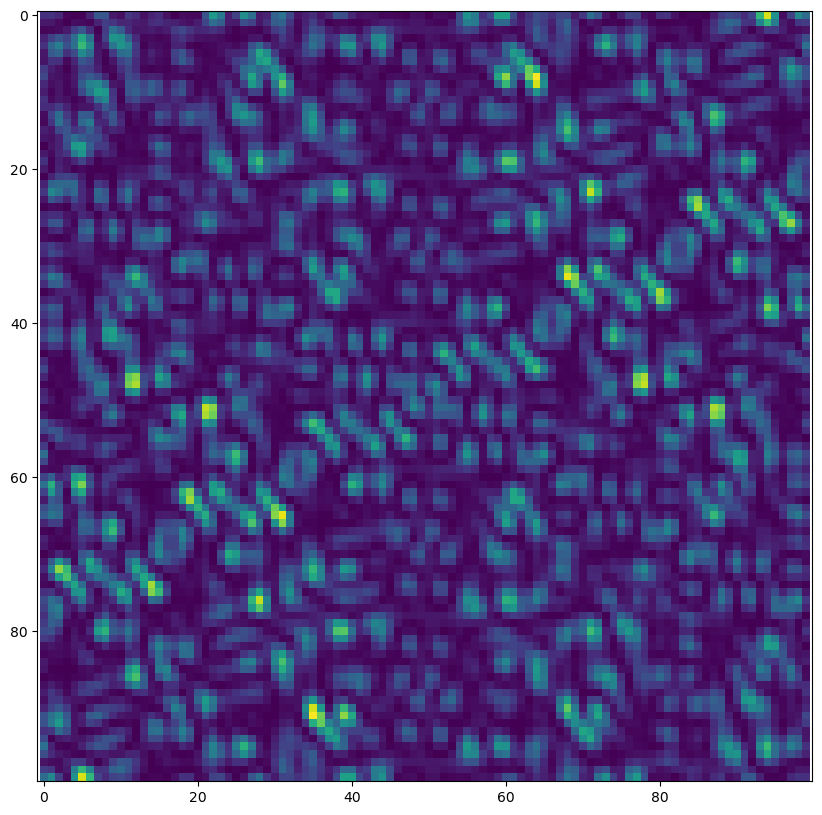

In [138]:
Smed = np.zeros(len(rx))
for i in range(1000):
    S = np.random.choice([-1,1], len(rx))
    Smed += S
    
Inte = intensity(Smed/1000, Axk, Ayk, Bxk, Byk)
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.imshow(Inte)

In [135]:
Smed/100

array([-0.02, -0.14,  0.16,  0.22, -0.04, -0.02, -0.04, -0.1 ,  0.14,
       -0.08,  0.04,  0.02, -0.08, -0.22,  0.04, -0.04,  0.12, -0.06,
        0.  , -0.12,  0.08, -0.04,  0.1 , -0.12, -0.08, -0.1 , -0.22,
        0.14,  0.02, -0.08, -0.1 ,  0.02,  0.06,  0.04,  0.02, -0.1 ,
        0.16,  0.06,  0.06, -0.08, -0.06, -0.2 , -0.12,  0.  ,  0.1 ,
        0.  , -0.14, -0.12,  0.1 , -0.04,  0.08, -0.06, -0.1 ,  0.1 ,
        0.  , -0.12,  0.08, -0.28,  0.04,  0.02,  0.06,  0.06,  0.04,
       -0.04, -0.08, -0.16,  0.  , -0.04, -0.08,  0.08, -0.08, -0.02,
        0.08, -0.04, -0.2 , -0.02,  0.02, -0.04, -0.08,  0.2 , -0.1 ,
       -0.08,  0.16,  0.16,  0.  , -0.1 ,  0.06, -0.22, -0.1 ,  0.1 ,
        0.04, -0.02,  0.1 , -0.2 ,  0.02, -0.18,  0.18, -0.14,  0.  ,
        0.06,  0.04,  0.  ,  0.06,  0.06, -0.08,  0.14, -0.04, -0.08])